# Visualización de datos 📊

En este jupyter se encuentra todo el proceso de visualización y planteamiento de hipótesis, de los datos procesados del dataset descargado de kaggle: "Shark attack"

*Consideraciones: 
Se incluyen comentarios al final de cada gráfica de cara a facilitar la resolución de la hipótesis y la toma de decisiones, no obstante, la conclusión final y los resultados se encuentran en el README. En aquellas columnas donde existen "UNKNOWN" o "0" (NaNs), los cuales no se procedieron a eliminar en el anterior jupyter (1. Cleaning_Data), debido a que si no se perdían datos relevantes de otras columnas para el caso único de cada variable no se tendrán en cuenta.*

## Índice 📎

1. Importación de librerías
2. Importación del dataset
3. Visualización de datos
>- Tendencia de los últimos años
>- Sexo y edad
>- País
>- Hora y época
>- Riesgo y actividad
4. Bibliografía

## 1. Importación de librerias 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Otras funciones

In [2]:
#import Funciones Funciones as fu

## 2. Importación del dataset 📖

In [3]:
data = pd.read_csv("./attacks_limpio.csv", dtype = str)
data = data.drop("Unnamed: 0", axis = 1)

In [4]:
data.sample(20)

,Date,Year,Country,Activity,Sex,Age,Fatal (Y/N),Time,Age2
785,Jul,1889,USA,Fishing,M,0,N,07,17
102,Feb,2013,USA,Surfing,M,16,N,14,16
231,Jan,2007,USA,Surfing,M,24,N,10,24
106,Nov,2012,USA,Surfing,M,43,N,08,43
903,Jun,2013,USA,Swimming,M,0,N,UNKNOWN,17
673,Feb,1975,SOUTH AFRICA,Surfing,M,16,N,10,16
554,Mar,1968,USA,Surfing,M,20,N,UNKNOWN,20
725,Sep,1966,USA,Fishing,M,20,N,UNKNOWN,20
718,UNKNOWN,1983,USA,Fishing,M,0,N,UNKNOWN,17
235,Oct,2006,USA,Surfing,M,0,N,UNKNOWN,17


## 3. Visualización de datos 👀

Las hipótesis/estudios planteados a próposito de establecer las características en materia a país, hora, época (mes), participantes y demás variables para el campeonato de IronWater son las siguientes:

- Veracidad de sí en los últimos años ha descendido el ataque de los tiburones
- Existencia de correlaccion entre el número de ataques producidos con el sexo y la edad del afectado
- País con menos accidentes (entre los propuestos)
- Mejor hora y época del año (mes) para realizar el campeonato
- Actividad con mayor riesgo (entre las propuestas)

*El principal objetivo es escoger aquellas en las que se produzca una menor cantidad de ataques de tiburón para garantizar la seguridad de todos los participantes y promover el respeto a la especie en cuestión.*

### 3.1 Tendencia de los últimos años ⏳

Se pretende comprobar si es cierto que en los últimos años se han producido un menor número de ataques de tiburón, o por el contrario han aumentado.

In [6]:
#data.Year = data.Year.astype("float")
#y = data[data["Year"]>0]
#y

In [ ]:
sns.kdeplot(y.Year).set_title("Ataques por año")

In [ ]:
sns.kdeplot(y.Year.astype("float"), hue=data["Fatal (Y/N)"], palette=("Set2")).set_title("Año y riesgo")

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.kdeplot(y.Year, ax=axs[0,0]).set_title("Ataques por año")
#sns.kdeplot(y.Year.astype("float"), hue=data["Fatal (Y/N)"], palette=("Set2"), ax=axs[0,1]).set_title("Año y riesgo")

*Comentarios = Se muestra una tendencia altiva, en general especialmente durante 1987 y 2018*

### 3.2 Sexo y Edad 👤

Se pretende analizar en que edad y género es menor la tendencia a recibir un ataque de un tiburón.

#### Sexo

In [7]:
#data.Sex.value_counts()

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.countplot(x=data.Sex, order=["M", "F"], palette=("Set2"), ax=axs[0,0]).set_title("Ataques por sexo")
#sns.countplot(x=data.Sex, order=["M","F"], hue=data["Fatal (Y/N)"], palette=("Set2"), ax=axs[0,1]).set_title("Sexo y riesgo")

Text(0.5, 1.0, 'Ataques por sexo')

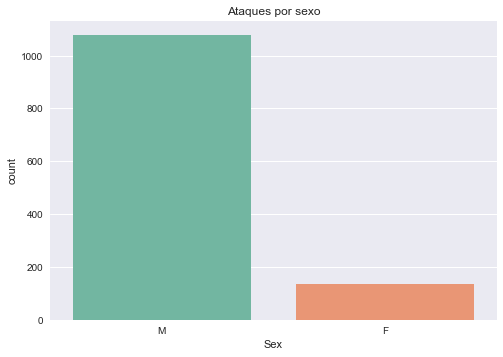

In [8]:
plt.style.use("seaborn")
sns.countplot(x=data.Sex, order=["M", "F"], palette=("Set2")).set_title("Ataques por sexo")

*Comentario = Parece que los hombres son más propensos a recibir un ataque.*

Text(0.5, 1.0, 'Sexo y riesgo')

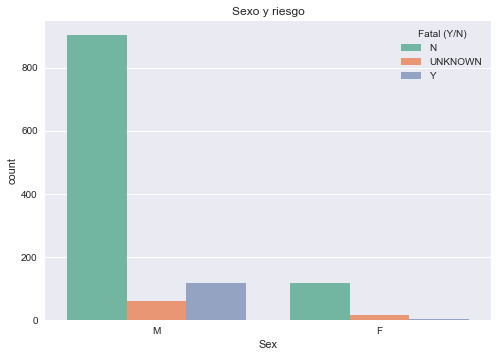

In [9]:
plt.style.use("seaborn")
sns.countplot(x=data.Sex, order=["M","F"], hue=data["Fatal (Y/N)"], palette=("Set2")).set_title("Sexo y riesgo")

*Comentario = Parece que de los ataques que reciben los hombres (los cuales son en mayor proporción que las mujeres) tales, resultan más letales.*

#### Edad

In [10]:
#data.Age.value_counts().sort_index()

In [11]:
data.Age = data.Age.astype("float")
e = data[data["Age"]>0]
#e

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.kdeplot(e.Age, ax=axs[0,0]).set_title("Ataques por edad")
#sns.kdeplot(e.Age, hue=data["Fatal (Y/N)"], palette=("Set2"), ax=axs[0,1]).set_title("Edad y riesgo")

Text(0.5, 1.0, 'Ataques por edad')

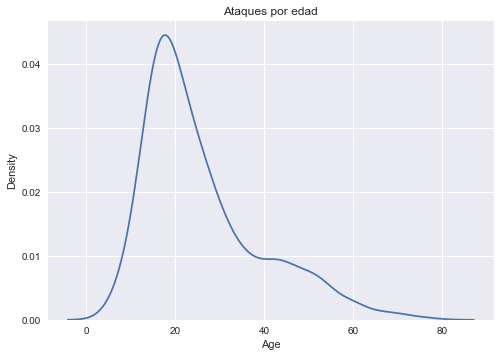

In [12]:
sns.kdeplot(e.Age).set_title("Ataques por edad")
#plot = axvline(data.Age.median(), c = 'red', label = 'mean')

Text(0.5, 1.0, 'Edad y riesgo')

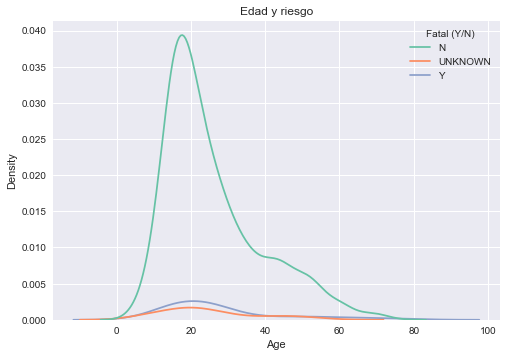

In [13]:
sns.kdeplot(e.Age, hue=data["Fatal (Y/N)"], palette=("Set2")).set_title("Edad y riesgo")
#plot = axvline(data.Age.median(), c = 'red', label = 'mean')

### 3.3 País 📍

Se pretende escoger el país que reporte menos accidentes para garantizar una mayor seguridad.

In [14]:
#país = pd.Series(data.Country.value_counts().sort_index())

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.countplot(x = data.Country,palette=("Set2"), ax=axs[0,0]).set_title("Ataques por país")
#sns.countplot(x=data.Country, hue=data["Fatal (Y/N)"], palette=("Set2"),ax=axs[0,0]).set_title("País y Riesgo")

Text(0.5, 1.0, 'Ataques por país')

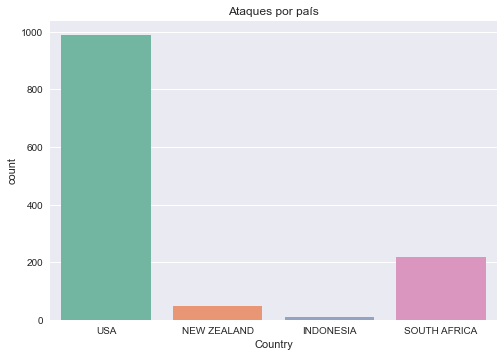

In [15]:
plt.style.use("seaborn")
sns.countplot(x = data.Country,palette=("Set2")).set_title("Ataques por país")

*Comentarios = Parece ser que el país más óptimo para la celebración es Indonesia.*

Text(0.5, 1.0, 'País y Riesgo')

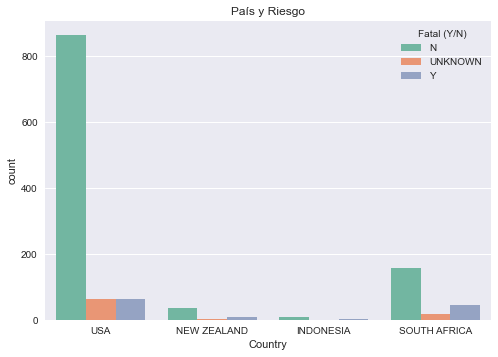

In [16]:
plt.style.use("seaborn")
sns.countplot(x=data.Country, hue=data["Fatal (Y/N)"], palette=("Set2")).set_title("País y Riesgo")

*Comentario = Si observamos la letalidad de dichos ataques el país más seguro sigue siendo Indonesia.*

### 3.4 Hora y época 🌤️

Se pretende escoger el momento del día y mes que reporte menos accidentes para garantizar una mayor seguridad.

#### Hora

In [17]:
#hora = pd.Series(data.Time.value_counts())

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.countplot(x = data.Time, palette=("Set2"), order = ["00", "02", "07", "09", "10","11","12", "13", "14", "15", "16", "17","18","19","20","23"], ax=axs[0,0]).set_title("Ataques por hora/momento del día")
#sns.countplot(x = data.Time, hue = data["Fatal (Y/N)"], order = ["00", "02", "07", "09", "10","11","12", "13", "14", "15", "16", "17","18","19","20","23"],palette= ("Set2"), ax=axs[0,1]).set_title("Hora/momento del día y riesgo")

Text(0.5, 1.0, 'Ataques por hora/momento del día')

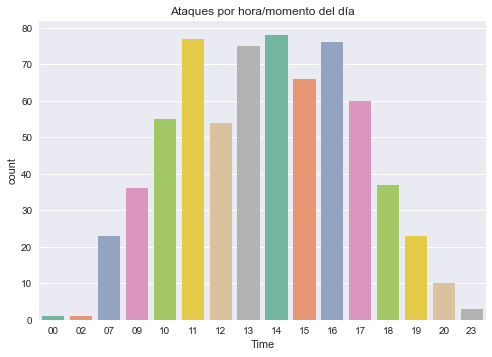

In [18]:
sns.countplot(x = data.Time, palette=("Set2"), order = ["00", "02", "07", "09", "10","11","12", "13", "14", "15", "16", "17","18","19","20","23"]).set_title("Ataques por hora/momento del día")

Text(0.5, 1.0, 'Hora/momento del día y riesgo')

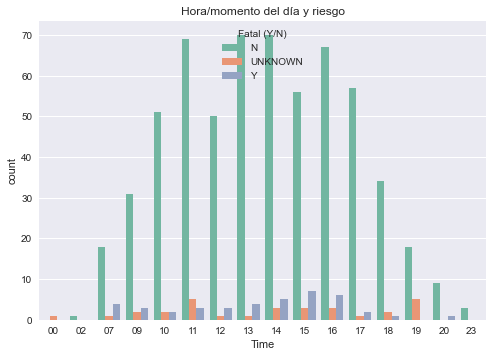

In [19]:
sns.countplot(x = data.Time, hue = data["Fatal (Y/N)"], order = ["00", "02", "07", "09", "10","11","12", "13", "14", "15", "16", "17","18","19","20","23"],palette= ("Set2")).set_title("Hora/momento del día y riesgo")

*Comentarios = El momento del día con mayor número de ataques es a las 14:00 y 11:00 mientras que el de menor número es por la noche entre las 21:00 y 05:00, coincidiendo con la letalidad*

#### Época

In [20]:
#época = pd.Series(data.Date.value_counts())

In [ ]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.countplot(x = data.Date, palette= ("Set2"), order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"], ax=axs[0,0]).set_title("Ataques por época/mes")
#sns.countplot(x=data.Date, hue=data["Fatal (Y/N)"], palette=("Set2"), order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"], ax=axs[0,1]).set_title("Época/mes y riesgo")

Text(0.5, 1.0, 'Ataques por época/mes')

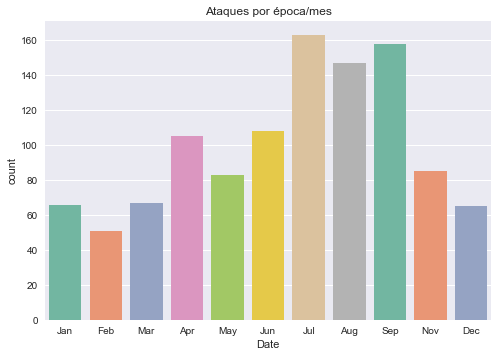

In [21]:
sns.countplot(x = data.Date, palette= ("Set2"), order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"]).set_title("Ataques por época/mes")

Text(0.5, 1.0, 'Época/mes y riesgo')

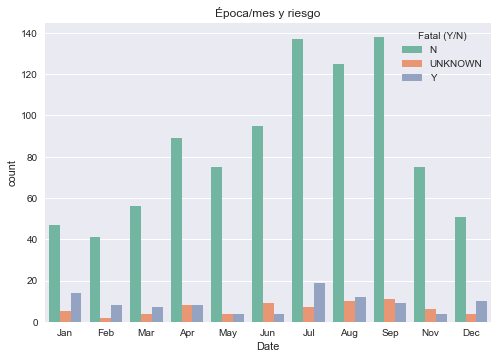

In [22]:
sns.countplot(x=data.Date, hue=data["Fatal (Y/N)"], palette=("Set2"), order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"]).set_title("Época/mes y riesgo")

*Comentarios: La época del año con menor número de accidentes, es en Febrero mientras que la mayor es en Julio, coincidiendo con la letalidad.*

### 3.5 Riesgo y Actividad 💀

Se pretende observar que actividad tiene más riesgo a fin de informar a los participantes y de elaborar los seguros contra riesgos en el momento del contrato de inscripción.

In [23]:
#data.Activity.value_counts()

In [32]:
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 15))
#sns.countplot(x=data.Activity, ax=axs[0,0], palette=("Set2")).set_title("Ataques por actividad")
#sns.countplot(x=data["Fatal (Y/N)"], hue=data.Activity, order=["Y", "N"], ax=axs[0,1], palette=("Set2")).set_title("Actividades y riesgo")

Text(0.5, 1.0, 'Ataques por actividad')

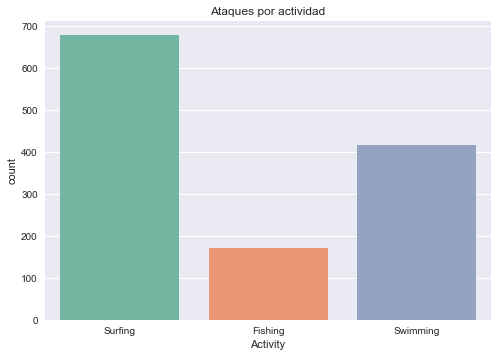

In [33]:
sns.countplot(x=data.Activity, palette=("Set2")).set_title("Ataques por actividad")

De los ataques producidos vamos a comprobar su letalidad.

Text(0.5, 1.0, 'Actividades y riesgo')

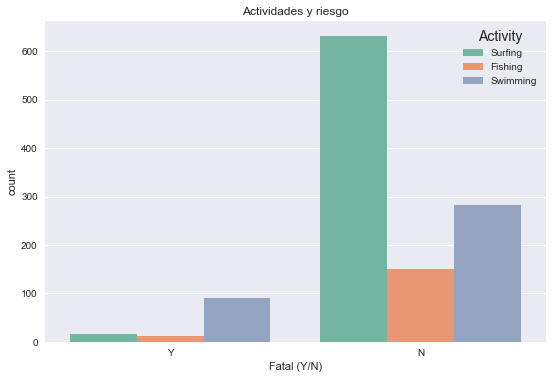

In [213]:
sns.countplot( x=data["Fatal (Y/N)"], hue=data.Activity, order=["Y", "N"], palette=("Set2")).set_title("Actividades y riesgo")

*Comentarios = Observamos que la actividad con un mayor número de ataques es el surf, seguida de la natación y en último lugar la pesca, sin embargo por el lado de la letalidad la mayor es la natación.*

## Bibliografía 📁

- [Matplotlib estilos](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
- [Visualización en seaborn](https://www.analyticslane.com/2018/07/20/visualizacion-de-datos-con-seaborn/)
- [Ejemplos de paletas de seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)